# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.5 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [0]:
## ADD YOUR CODE HERE
import numpy as np
import sklearn
import sklearn.pipeline# adjust settings to plot nice figures inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
X, Y = make_moons(1000, noise=0.5, random_state=0)
poly = PolynomialFeatures(10)
train = poly.fit_transform(X)
print(train[:5,:2])

[[ 1.          2.21643005]
 [ 1.          2.05742651]
 [ 1.         -0.11684681]
 [ 1.         -0.71079717]
 [ 1.          0.26754828]]


2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



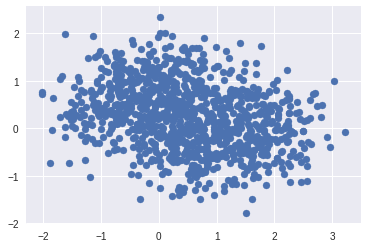

In [4]:


## ADD YOUR CODE HERE
# The first dimension is bias, so the second and third dimension are visualised here instead
plt.scatter(train[:,1], train[:,2])
plt.show()

3) Use a Decision Tree to classify the data (5 points)



In [0]:

x_train, x_test, y_train, y_test = train_test_split(train, Y, test_size=0.2,shuffle=True, random_state=0)

In [6]:
## ADD YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
dtree.score(x_test, y_test)

0.715

4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [7]:
## ADD YOUR CODE HERE
dtree_gini = DecisionTreeClassifier(random_state=0)
dtree_info = DecisionTreeClassifier(random_state=0, criterion="entropy")

dtree_gini.fit(x_train, y_train)
dtree_info.fit(x_train, y_train)

score_gini = dtree_gini.score(x_test, y_test)
score_info = dtree_info.score(x_test, y_test)

print("performance of Gini Impurity:", score_gini)
print("performance of Information Gain:", score_info)
if score_gini > score_info:
    print("Gini Impurity performs better")
else:
    print("Information Gain performs better")

performance of Gini Impurity: 0.715
performance of Information Gain: 0.75
Information Gain performs better


5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



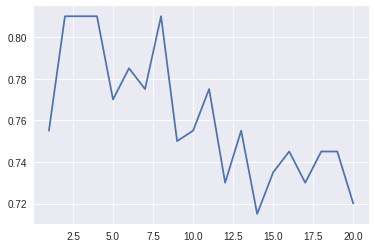

In [8]:
## ADD YOUR CODE HERE
depth = list(range(1, 21))
scores = []
for i in range(1,21):
    dtree = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=i)
    dtree.fit(x_train, y_train)
    score = dtree.score(x_test, y_test)
    scores.append(score)
plt.plot(depth, scores)
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



In [0]:
## ADD YOUR CODE HERE

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



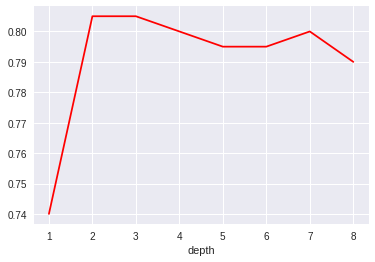

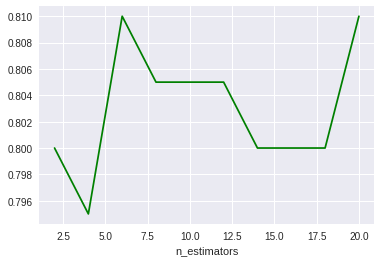

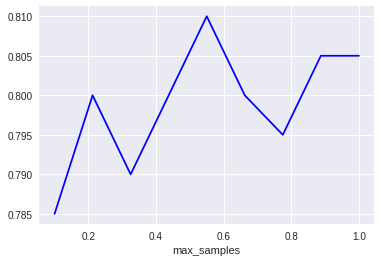

In [10]:
## ADD YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
depth_range = [1,2,3,4,5,6,7,8]
est_range = [2,4,6,8,10,12,14,16,18,20]
sample_range = np.linspace(0.1,1.0,9)
scores = []
for depth in depth_range:
    bagging = BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=depth), \
                               random_state=0)
    bagging.fit(x_train, y_train)
    score = bagging.score(x_test, y_test)
    scores.append(score)
plt.plot(depth_range, scores, 'r')
plt.xlabel("depth")
plt.show()

scores = []
for est in est_range:
        bagging = BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=2),\
                                   n_estimators=est, random_state=0)
        bagging.fit(x_train, y_train)
        score = bagging.score(x_test, y_test)
        scores.append(score)
plt.plot(est_range, scores, 'g')
plt.xlabel("n_estimators")
plt.show()

scores = []
for sam in sample_range:
        bagging = BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=2),\
                                   max_samples=sam, random_state=0)
        bagging.fit(x_train, y_train)
        score = bagging.score(x_test, y_test)
        scores.append(score)
plt.plot(sample_range, scores, 'b')
plt.xlabel("max_samples")
plt.show()

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

In [11]:
## ADD YOUR CODE HERE
"""We use Bootstraping to resample from the original dataset, and then decrease model variance by averaging.
Replacement is required, so that samples may be repeated and each resampled set is different. If we resample without
replacement, then when the resampled size is equal to the original data size, each resampled set is the same to the
original one."""

'We use Bootstraping to resample from the original dataset, and then decrease model variance by averaging.\nReplacement is required, so that samples may be repeated and each resampled set is different. If we resample without\nreplacement, then when the resampled size is equal to the original data size, each resampled set is the same to the\noriginal one.'

9)  Use a Decision Forest to classify the dataset (4 points)



In [12]:
## ADD YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.745

10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



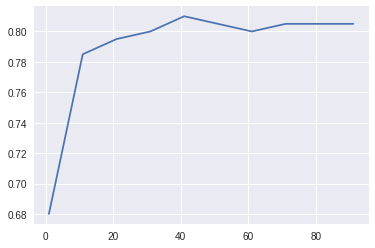

In [13]:
## ADD YOUR CODE HERE
num_tree = list(range(1,100,10))
scores = []
for num in num_tree:
    forest = RandomForestClassifier(n_estimators=num, random_state=0)
    forest.fit(x_train, y_train)
    scores.append(forest.score(x_test, y_test))
plt.plot(num_tree, scores)
plt.show()

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



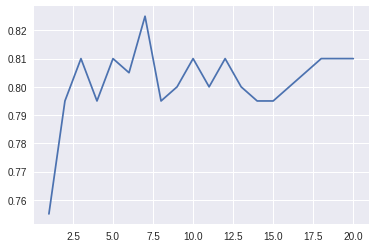

In [14]:
## ADD YOUR CODE HERE
depth = list(range(1,21))
scores = []
for dep in depth:
    forest = RandomForestClassifier(n_estimators=41, random_state=0, max_depth=dep)
    forest.fit(x_train, y_train)
    scores.append(forest.score(x_test, y_test))
plt.plot(depth, scores)
plt.show()

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In [0]:
## ADD YOUR CODE HERE

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

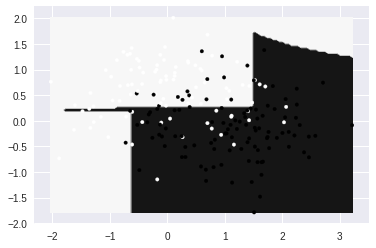

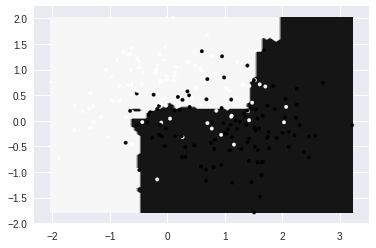

In [16]:
## ADD YOUR CODE HERE
from sklearn.neighbors.classification import KNeighborsClassifier
def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X[:,1]), np.max(X[:,1])
    X2d_ymin, X2d_ymax = np.min(X[:,2]), np.max(X[:,2])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
#     background_model = KNeighborsClassifier(n_neighbors=1).fit(X[:,1:3], Y_pred) 
    voronoiBackground = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X[:,1], X[:,2], c=y,marker='.')
    plt.show()
    
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
forest = RandomForestClassifier(random_state=0, n_estimators=41, max_depth=4)
tree.fit(x_train, y_train)
forest.fit(x_train, y_train)
plot_decision_boundary(tree, x_test, y_test)
plot_decision_boundary(forest, x_test, y_test)

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [0]:
# load the data
import numpy as np
import pandas as pd

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [0]:
## ADD YOUR CODE HERE
def extract_data(X, y, labels):
    x_result = np.concatenate((X[y==labels[0]], X[y==labels[1]]))
    y_result = np.concatenate((y[y==labels[0]], y[y==labels[1]]))
    return x_result, y_result

labels=[0,9]

x_train_part, y_train_part = extract_data(x_train, y_train, labels)
x_test_part, y_test_part = extract_data(x_test, y_test, labels)
x_train_part, x_valid, y_train_part, y_valid = train_test_split(x_train_part, y_train_part, \
                                                                test_size=0.2,shuffle=True, random_state=0)

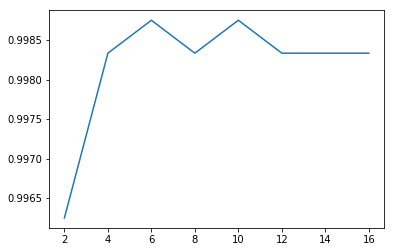

0.9985


In [0]:
depths = [2,4,6,8,10,12,14,16]
scores = []
opt = 0
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(x_train_part, y_train_part)
    score = tree.score(x_valid, y_valid)
    scores.append(score)
    if score > opt:
        opt = score
        opt_dpt = depth
plt.plot(depths, scores)
plt.show()
tree = DecisionTreeClassifier(max_depth=opt_dpt)
tree.fit(x_train_part, y_train_part)
print(tree.score(x_test_part, y_test_part))

In [0]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train_part, y_train_part)
score = adaboost.score(x_test_part, y_test_part)
print(score)

0.999


depth: 1, score: 0.9908333333333333
depth: 2, score: 0.9929166666666667
depth: 3, score: 0.9970833333333333
depth: 4, score: 0.9975


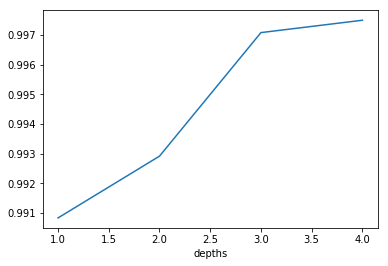

num: 2, score: 0.9908333333333333
num: 3, score: 0.9945833333333334
num: 4, score: 0.9970833333333333
num: 5, score: 0.9983333333333333
num: 6, score: 0.9975


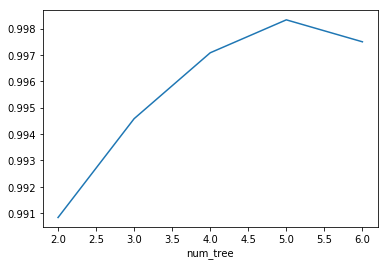

In [0]:
# The models perform pretty well (>0.999) with large n_estimators or max_depth, so we use small number here to make
# the difference more obvious
depths = [1,2,3,4]
num_tree = [2,3,4,5,6]

scores = []
for depth in depths:
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth, random_state=0), n_estimators=2, \
                             random_state=0)
    ada.fit(x_train_part, y_train_part)
    score = ada.score(x_valid, y_valid)
    scores.append(score)
    print("depth: {}, score: {}".format(depth, score))
plt.plot(depths, scores)
plt.xlabel("depths")
plt.show()

scores=[]
for num in num_tree:
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=num, \
                             random_state=0)
    ada.fit(x_train_part, y_train_part)
    score = ada.score(x_valid, y_valid)
    scores.append(score)
    print("num: {}, score: {}".format(num, score))
plt.plot(num_tree, scores)
plt.xlabel("num_tree")
plt.show()

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, \
                                                      y_train, test_size=0.15,shuffle=True, random_state=0)

In [0]:
forest = RandomForestClassifier(n_estimators=20, max_depth=10, criterion="entropy")
forest.fit(x_train, y_train)
score_forest = forest.score(x_valid, y_valid)
print(score_forest)

0.8519444444444444


In [0]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7, criterion="entropy", random_state=0), n_estimators=5)
ada.fit(x_train, y_train)
score_ada = ada.score(x_valid, y_valid)
print(score_ada)

0.6963888888888888
